In [2]:
import pandas as pd

from textwrap import fill

FIGURES_DIRECTORY = '../figures'

In [3]:
data = pd.read_csv("survey.csv", mangle_dupe_cols=True)
data.columns

Index(['Unnamed: 0', 'ID', 'Start time', 'Completion time',
       'Wat is jouw functie?', 'Hoelang ben je werkzaam bij KEMBIT?',
       'Beheerwerkzaamheden', 'Troubleshooting\n', 'Design',
       'Automatisering\n', 'Beheerwerkzaamheden2', 'Troubleshooting',
       'Design2',
       'Hoeveel ervaring heb je met programmeren (naar inschatting)',
       'Met welke programmeertalen heb je ervaring?',
       'Maak je gebruik van automatiseringstools bij je huidige werkzaamheden?',
       'Welke automatiseringstools gebruik je momenteel?',
       'Voor welk type werkzaamheden gebruik je deze tool(s)?',
       'Denk je dat je jouw werkzaamheden beter/sneller zou kunnen uitvoeren door (meer) gebruik te maken van automatiseringstools?',
       'Waarom niet?', 'Waarom wel?',
       'Is het gemakkelijk om te leren hoe automatiseringstools ingezet en/of gebruikt kunnen worden in jouw werkzaamheden?',
       'Is het gemakkelijk om automatiseringstools in te zetten of te gebruiken voor jouw werkz

## Aantal antwoorden

In [4]:
len(data)

9

## Wat is jouw functie?

<AxesSubplot:ylabel='False'>

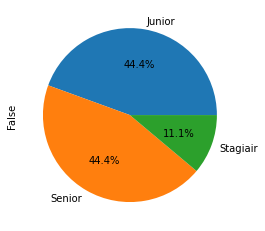

In [5]:
q = "Wat is jouw functie?"

(
    data[q]
    .value_counts(dropna=True)
    .plot(kind='pie', ylabel=False, autopct='%1.1f%%')
)


## Hoelang ben je werkzaam bij KEMBIT?

<AxesSubplot:>

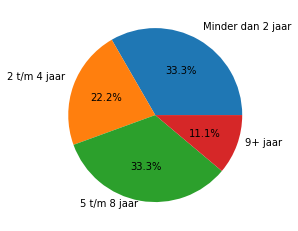

In [6]:
q = "Hoelang ben je werkzaam bij KEMBIT?"

order = [
    "Minder dan 2 jaar\n",
    "2 t/m 4 jaar\n",
    "5 t/m 8 jaar\n",
    "9+ jaar\n"
]

(
    data[q]
    .value_counts()
    .loc[order]
    .plot(kind='pie', ylabel='', autopct='%1.1f%%')
)


## 

## Hoe regelmatig verricht je activiteiten welke tot de volgende categorieën behoren?

<AxesSubplot:>

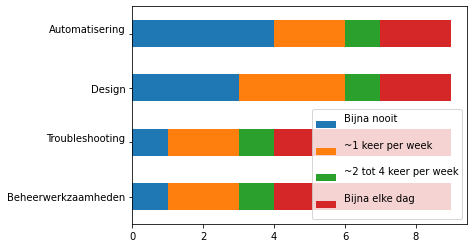

In [7]:
columns = [
    "Beheerwerkzaamheden",
    "Troubleshooting\n",
    "Design",
    "Automatisering\n"
]

order = [
    "Bijna nooit\n",
    "~1 keer per week\n",
    "~2 tot 4 keer per week\n",
    "Bijna elke dag\n"
]

(
    data[columns]
    .apply(pd.value_counts)
    .loc[order]
    .transpose()
    .plot(kind='barh', stacked=True)
)


## Welke werkzaamheden zouden volgens jou het meest waardevol zijn om automatisering bij toe te passen?

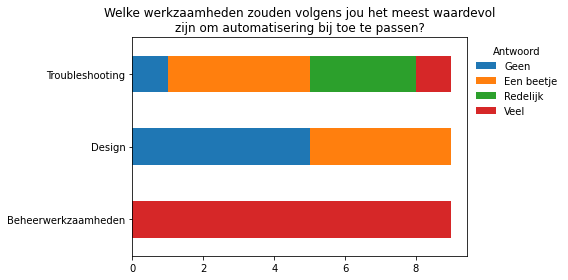

In [8]:
q = "Welke werkzaamheden zouden volgens jou het meest waardevol zijn om automatisering bij toe te passen?"

columns = [
    'Beheerwerkzaamheden2',
    'Design2',
    'Troubleshooting'
]

names = [
    'Beheerwerkzaamheden',
    'Design',
    'Troubleshooting'
]

translation_table = dict(zip(columns, names))

order = [
    "Geen\n",
    "Een beetje\n",
    "Redelijk\n",
    "Veel"
]

order_display = [
    "Geen",
    "Een beetje",
    "Redelijk",
    "Veel"
]

order_display_lookup = dict(zip(order, order_display))

plot = (
    data[columns]
    .replace(order_display_lookup)
    .apply(pd.value_counts)
    .rename(columns=translation_table)
    .loc[order_display]
    .transpose()
    .plot(kind='barh', stacked=True, figsize=(8,4), title=fill(q, 60))
)

plot.legend(title='Antwoord', bbox_to_anchor=(1,1), loc="upper left", frameon=False)
fig = plot.get_figure()
fig.tight_layout()
fig.savefig(f'{FIGURES_DIRECTORY}/suvey_mening_toepassingsgebied_automatisering.pdf')

## Hoeveel ervaring heb je met programmeren (naar inschatting)

<AxesSubplot:>

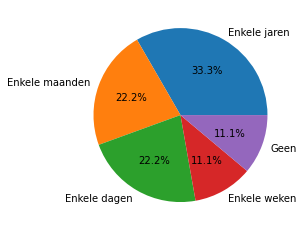

In [9]:
data['Hoeveel ervaring heb je met programmeren (naar inschatting)'].value_counts().plot(kind='pie', ylabel='', autopct='%1.1f%%')

## Met welke programmeertalen heb je ervaring?

<AxesSubplot:ylabel='False'>

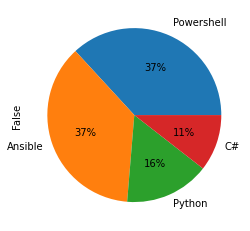

In [10]:
lan = ''.join(data['Met welke programmeertalen heb je ervaring?'].to_list()).split(';')[:-1]

lan = pd.Series(lan)

lan.value_counts().plot(kind='pie', ylabel=False, autopct='%1.0f%%')

## Maak je gebruik van automatiseringstools bij je huidige werkzaamheden?

<AxesSubplot:title={'center':'Maak je gebruik van automatiseringstools\nbij je huidige werkzaamheden?'}>

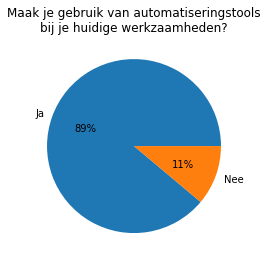

In [11]:
q = 'Maak je gebruik van automatiseringstools bij je huidige werkzaamheden?'

data[q].value_counts().plot(kind='pie', autopct='%1.0f%%', ylabel='', title=fill(q, 40))

## Welke automatiseringstools gebruik je momenteel?

<AxesSubplot:title={'center':'Welke automatiseringstools gebruik je\nmomenteel?'}, ylabel='None'>

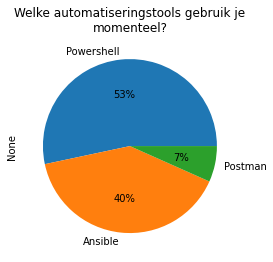

In [12]:
q = 'Welke automatiseringstools gebruik je momenteel?'

tools = ''.join(data[q].dropna().to_list()).split(';')[:-1]
tools = pd.Series(tools)

tools.value_counts().plot(kind='pie', autopct='%1.0f%%', title=fill(q, 40))

## Voor welk type werkzaamheden gebruik je deze tool(s)?

<AxesSubplot:>

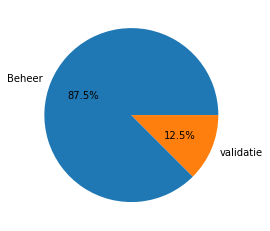

In [13]:
data['Voor welk type werkzaamheden gebruik je deze tool(s)?'].dropna().value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')

## Denk je dat je jouw werkzaamheden beter/sneller zou kunnen uitvoeren door (meer) gebruik te maken van automatiseringstools?

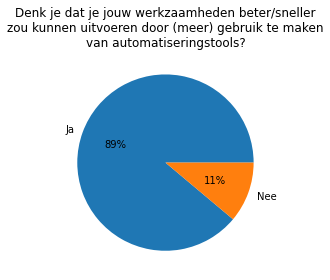

In [14]:
q = 'Denk je dat je jouw werkzaamheden beter/sneller zou kunnen uitvoeren door (meer) gebruik te maken van automatiseringstools?'

plot = (
    data[q]
    .value_counts()
    .plot(kind='pie', ylabel='', autopct='%1.0f%%', title=fill(q, 50))
)

fig = plot.get_figure()
fig.tight_layout()
fig.savefig(f'{FIGURES_DIRECTORY}/survey_pie_meer_automatisering_mening.pdf')

### Waarom niet?

In [15]:
q = 'Waarom niet?'

data[q].dropna()

4    Geen tijd voor\n;
Name: Waarom niet?, dtype: object

### Waarom wel?

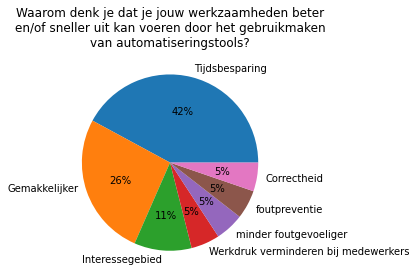

In [32]:
q = 'Waarom wel?'

title = ('Waarom denk je dat je jouw werkzaamheden beter en/of '
        'sneller uit kan voeren door het gebruikmaken van automatiseringstools?')

wel = ''.join(data[q].dropna()).split(';')[:-1]

wel = pd.Series(wel)

plot = wel.value_counts().plot(kind='pie', ylabel='', autopct='%1.0f%%', title=fill(title, 50))

fig = plot.get_figure()
fig.tight_layout()
fig.savefig(f'{FIGURES_DIRECTORY}/suvey_survey_waarom_automatiseren.pdf')

## Is het gemakkelijk om te leren hoe automatiseringstools ingezet en/of gebruikt kunnen worden in jouw werkzaamheden?

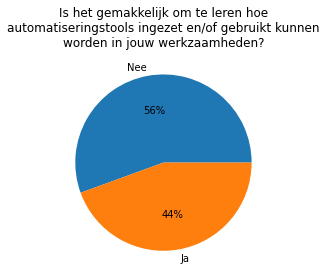

In [31]:
q = 'Is het gemakkelijk om te leren hoe automatiseringstools ingezet en/of gebruikt kunnen worden in jouw werkzaamheden?'

plot = data[q].value_counts().plot(kind='pie', ylabel='', autopct='%1.0f%%', title=fill(q, 50))

fig = plot.get_figure()
fig.tight_layout()
fig.savefig(f'{FIGURES_DIRECTORY}/survey_leren_automatiseren.pdf')

## Is het gemakkelijk om automatiseringstools in te zetten of te gebruiken voor jouw werkzaamheden (in productie omgevingen)?

<AxesSubplot:>

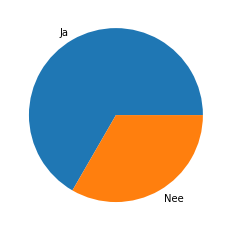

In [18]:
q = 'Is het gemakkelijk om automatiseringstools in te zetten of te gebruiken voor jouw werkzaamheden (in productie omgevingen)?'

data[q].value_counts().plot(kind='pie', ylabel='')

## Helpen de volgende applicaties jou met het sneller en/of beter uitvoeren van jouw werkzaamheden?

<AxesSubplot:>

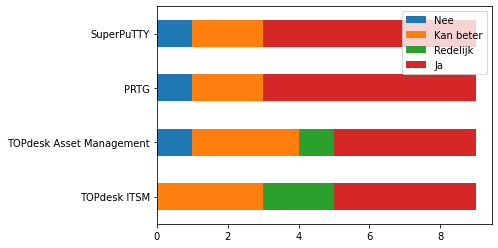

In [19]:
q = [
    'Topdesk (voor incidenten, changes en project management)',
    'Topdesk Asset Management',
    'PRTG',
    'SuperPuTTY'
]

names = [
    'TOPdesk ITSM',
    'TOPdesk Asset Management',
    'PRTG',
    'SuperPuTTY'
]

translation_table = dict(zip(q, names))

ans = [
    'Nee',
    'Kan beter',
    'Redelijk',
    'Ja'
    
]

(
    data[q]
    .apply(pd.value_counts)
    .rename(columns=translation_table)
    .fillna(0)
    .loc[ans]
    .transpose()
    .plot(kind='barh', stacked=True)
)


## Wat kost jou als medewerker de meeste tijd?

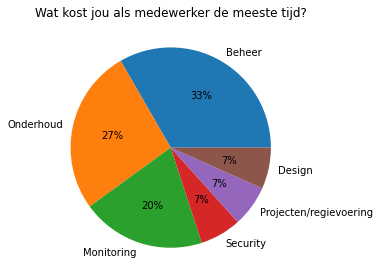

In [20]:
q = 'Wat kost jou als medewerker de meeste tijd?'

plot = (
    pd.Series(
    ''.join(data[q]).split(';')[:-1])
    .value_counts()
    .plot(kind='pie', ylabel='', title=q, autopct='%1.0f%%')
)

fig = plot.get_figure()
fig.tight_layout()
fig.savefig(f'{FIGURES_DIRECTORY}/survey_pie_meeste_tijd.pdf')

## Waarom kost dit veel tijd?

In [21]:
q = 'Waarom kost dit veel tijd?'

data[q]

0    Bepaalde stappen zijn overbodig afhankelijk va...
1    veel handwerk, bijv. transfer van nieuw image ...
2                   Teveel repeterende werkzaamheden. 
3                Veel handmatige controlen/handelingen
4    Regievoering en projecten hebben lange doorloo...
5          Handmatig invoeren van gegevens uit Topdesk
6    niet alles geautomatiseerd (updates zouden al ...
7    Veel repetitieve zaken worden handmatig gedaan...
8                            Onderdeel van takenpakket
Name: Waarom kost dit veel tijd?, dtype: object

## Welk proces kan volgens jou beter?

<AxesSubplot:ylabel='None'>

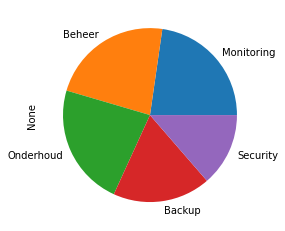

In [22]:
q = 'Welk proces kan volgens jou beter?'

pd.Series(''.join(data[q]).split(';')[:-1]).value_counts().plot(kind='pie')

## Waarom kunnen deze processen beter?

In [23]:
q = 'Waarom kunnen deze processen beter?'

data[q]

0    Handmatige handelingen die gemakkelijk geautom...
1    monitoring: automatisch ticket logging in topd...
2    Omdat in alle processen nog sprake is van hand...
3    Ontbreken van informatie die handmatig verwerk...
4    Security inzake de netwerkapparatuur moet omho...
5                                       Tijdsbesparing
6    tickets worden niet autoamtisch gemaakt, backu...
7    Er zijn nog veel aspecten die geautomatiseerd ...
8    Er zijn te veel mensen met een beheeractivitei...
Name: Waarom kunnen deze processen beter?, dtype: object

## Heb je nog overige opmerking met betrekking tot het toepassen van automatiseren en/of deze enquete?

In [24]:
q = 'Heb je nog overige opmerking met betrekking tot het toepassen van automatiseren en/of deze enquete?'

data[q].dropna()

0    Beschrijf welke processen geautomatiseerd gaan...
7                                  Goed bezig Martijn!
Name: Heb je nog overige opmerking met betrekking tot het toepassen van automatiseren en/of deze enquete?, dtype: object